Import libraries, packages and set settings for warnings and ploting style.

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Kaggle link: https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction

Prices are in $.

Reading data.

In [119]:
data = pd.read_csv('NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [120]:
# checking null values, type of features and description

display(data.isnull().sum())

print(data.info())

data.describe()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
None


,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


EDA and Feature Engineering Part.

In [121]:
# checking Adj Close with close are they the same

(data['Adj Close'] == data['Close']).sum()

data.drop('Adj Close', inplace = True, axis = 1)
data


,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200


Cause Adj Close and Close columns are the same, we drop Adj Close column.

In [127]:
# adding change column of open and close prices

data['Change'] = (- 100 + (data['Close'] * 100 / data['Open']))
data

,Date,Open,High,Low,Close,Volume,Change
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,-2.954200
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,7.274931
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,-0.757742
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,-6.357639
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,-1.725430
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,6.261665
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,5.582505
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,-4.187393
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,-3.758541


In [133]:
# changing format of date from object to datetime

data['Date'] = pd.to_datetime(data['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1009 non-null   datetime64[ns]
 1   Open    1009 non-null   float64       
 2   High    1009 non-null   float64       
 3   Low     1009 non-null   float64       
 4   Close   1009 non-null   float64       
 5   Volume  1009 non-null   int64         
 6   Change  1009 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


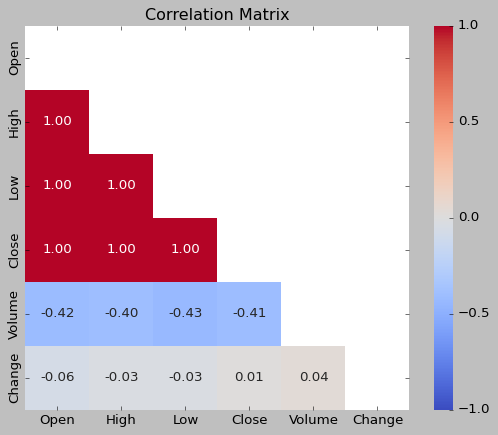

In [134]:
# correlation matrix

sns.heatmap(data = data.corr(numeric_only = True), mask = np.triu(np.ones_like(data.corr(numeric_only = True))), 
            cmap = 'coolwarm', vmin = -1, vmax = 1, square  = True, annot = True, fmt = '.2f');
plt.title('Correlation Matrix');

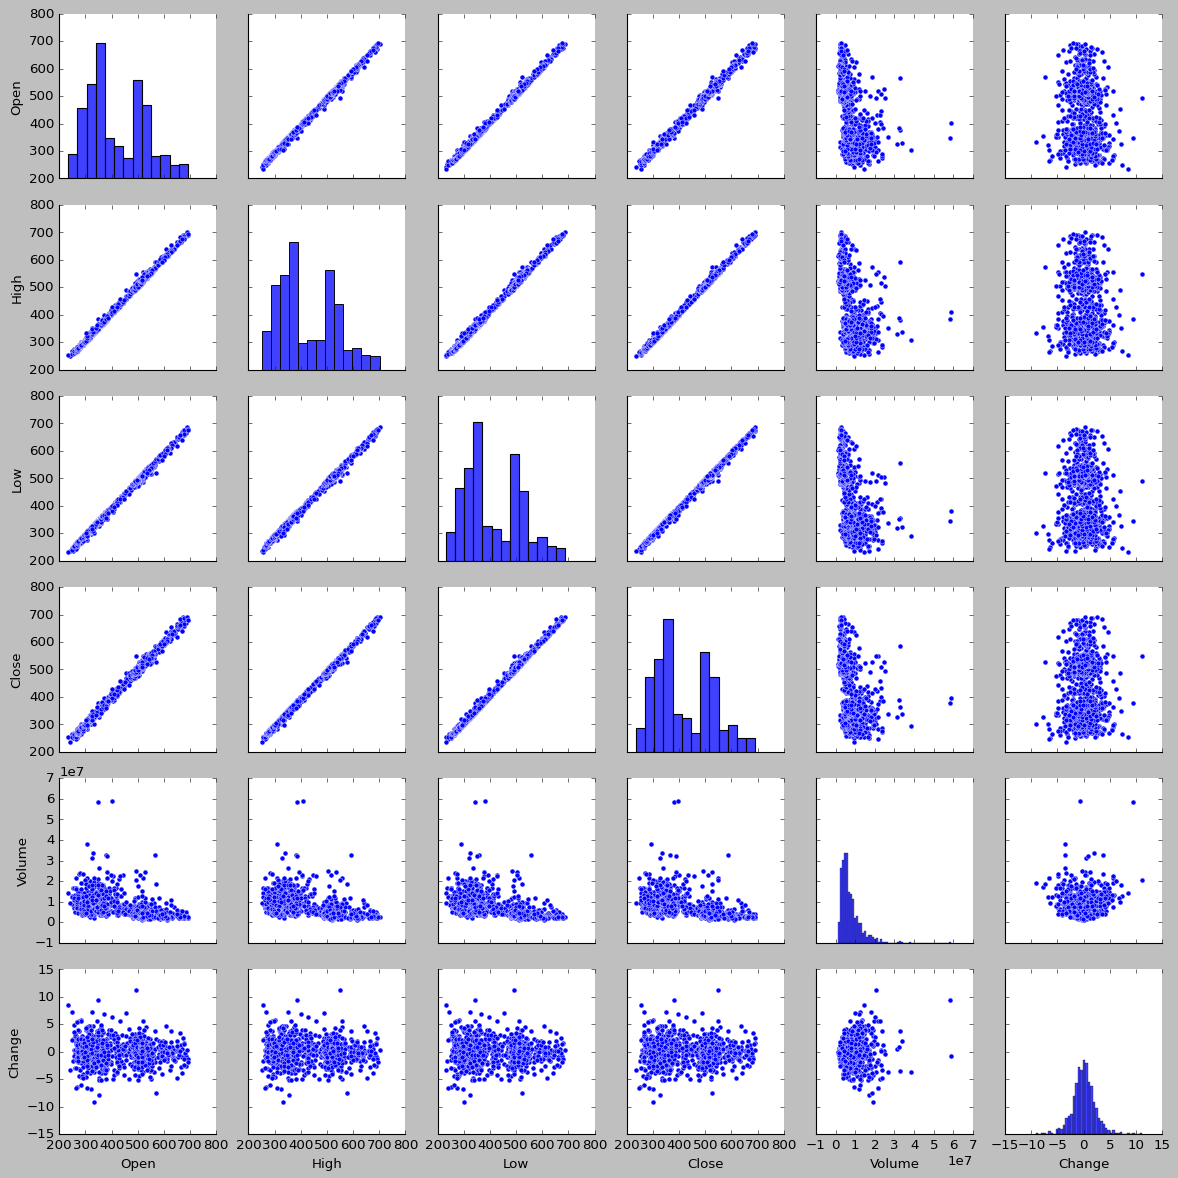

In [135]:
# pairplot

sns.pairplot(data = data);

In [136]:
# minimum price of all data

print('Minimum:', '\n', data.loc[data['Low'] == data['Low'].min(), :])

# maximum

print('Maximum:', '\n', data.loc[data['High'] == data['High'].max(), :])

Minimum: 
           Date        Open   High         Low       Close    Volume    Change
224 2018-12-26  233.919998  254.5  231.229996  253.669998  14402700  8.443058
Maximum: 
           Date   Open       High         Low       Close   Volume    Change
954 2021-11-17  690.0  700.98999  686.090027  691.690002  2732800  0.244928


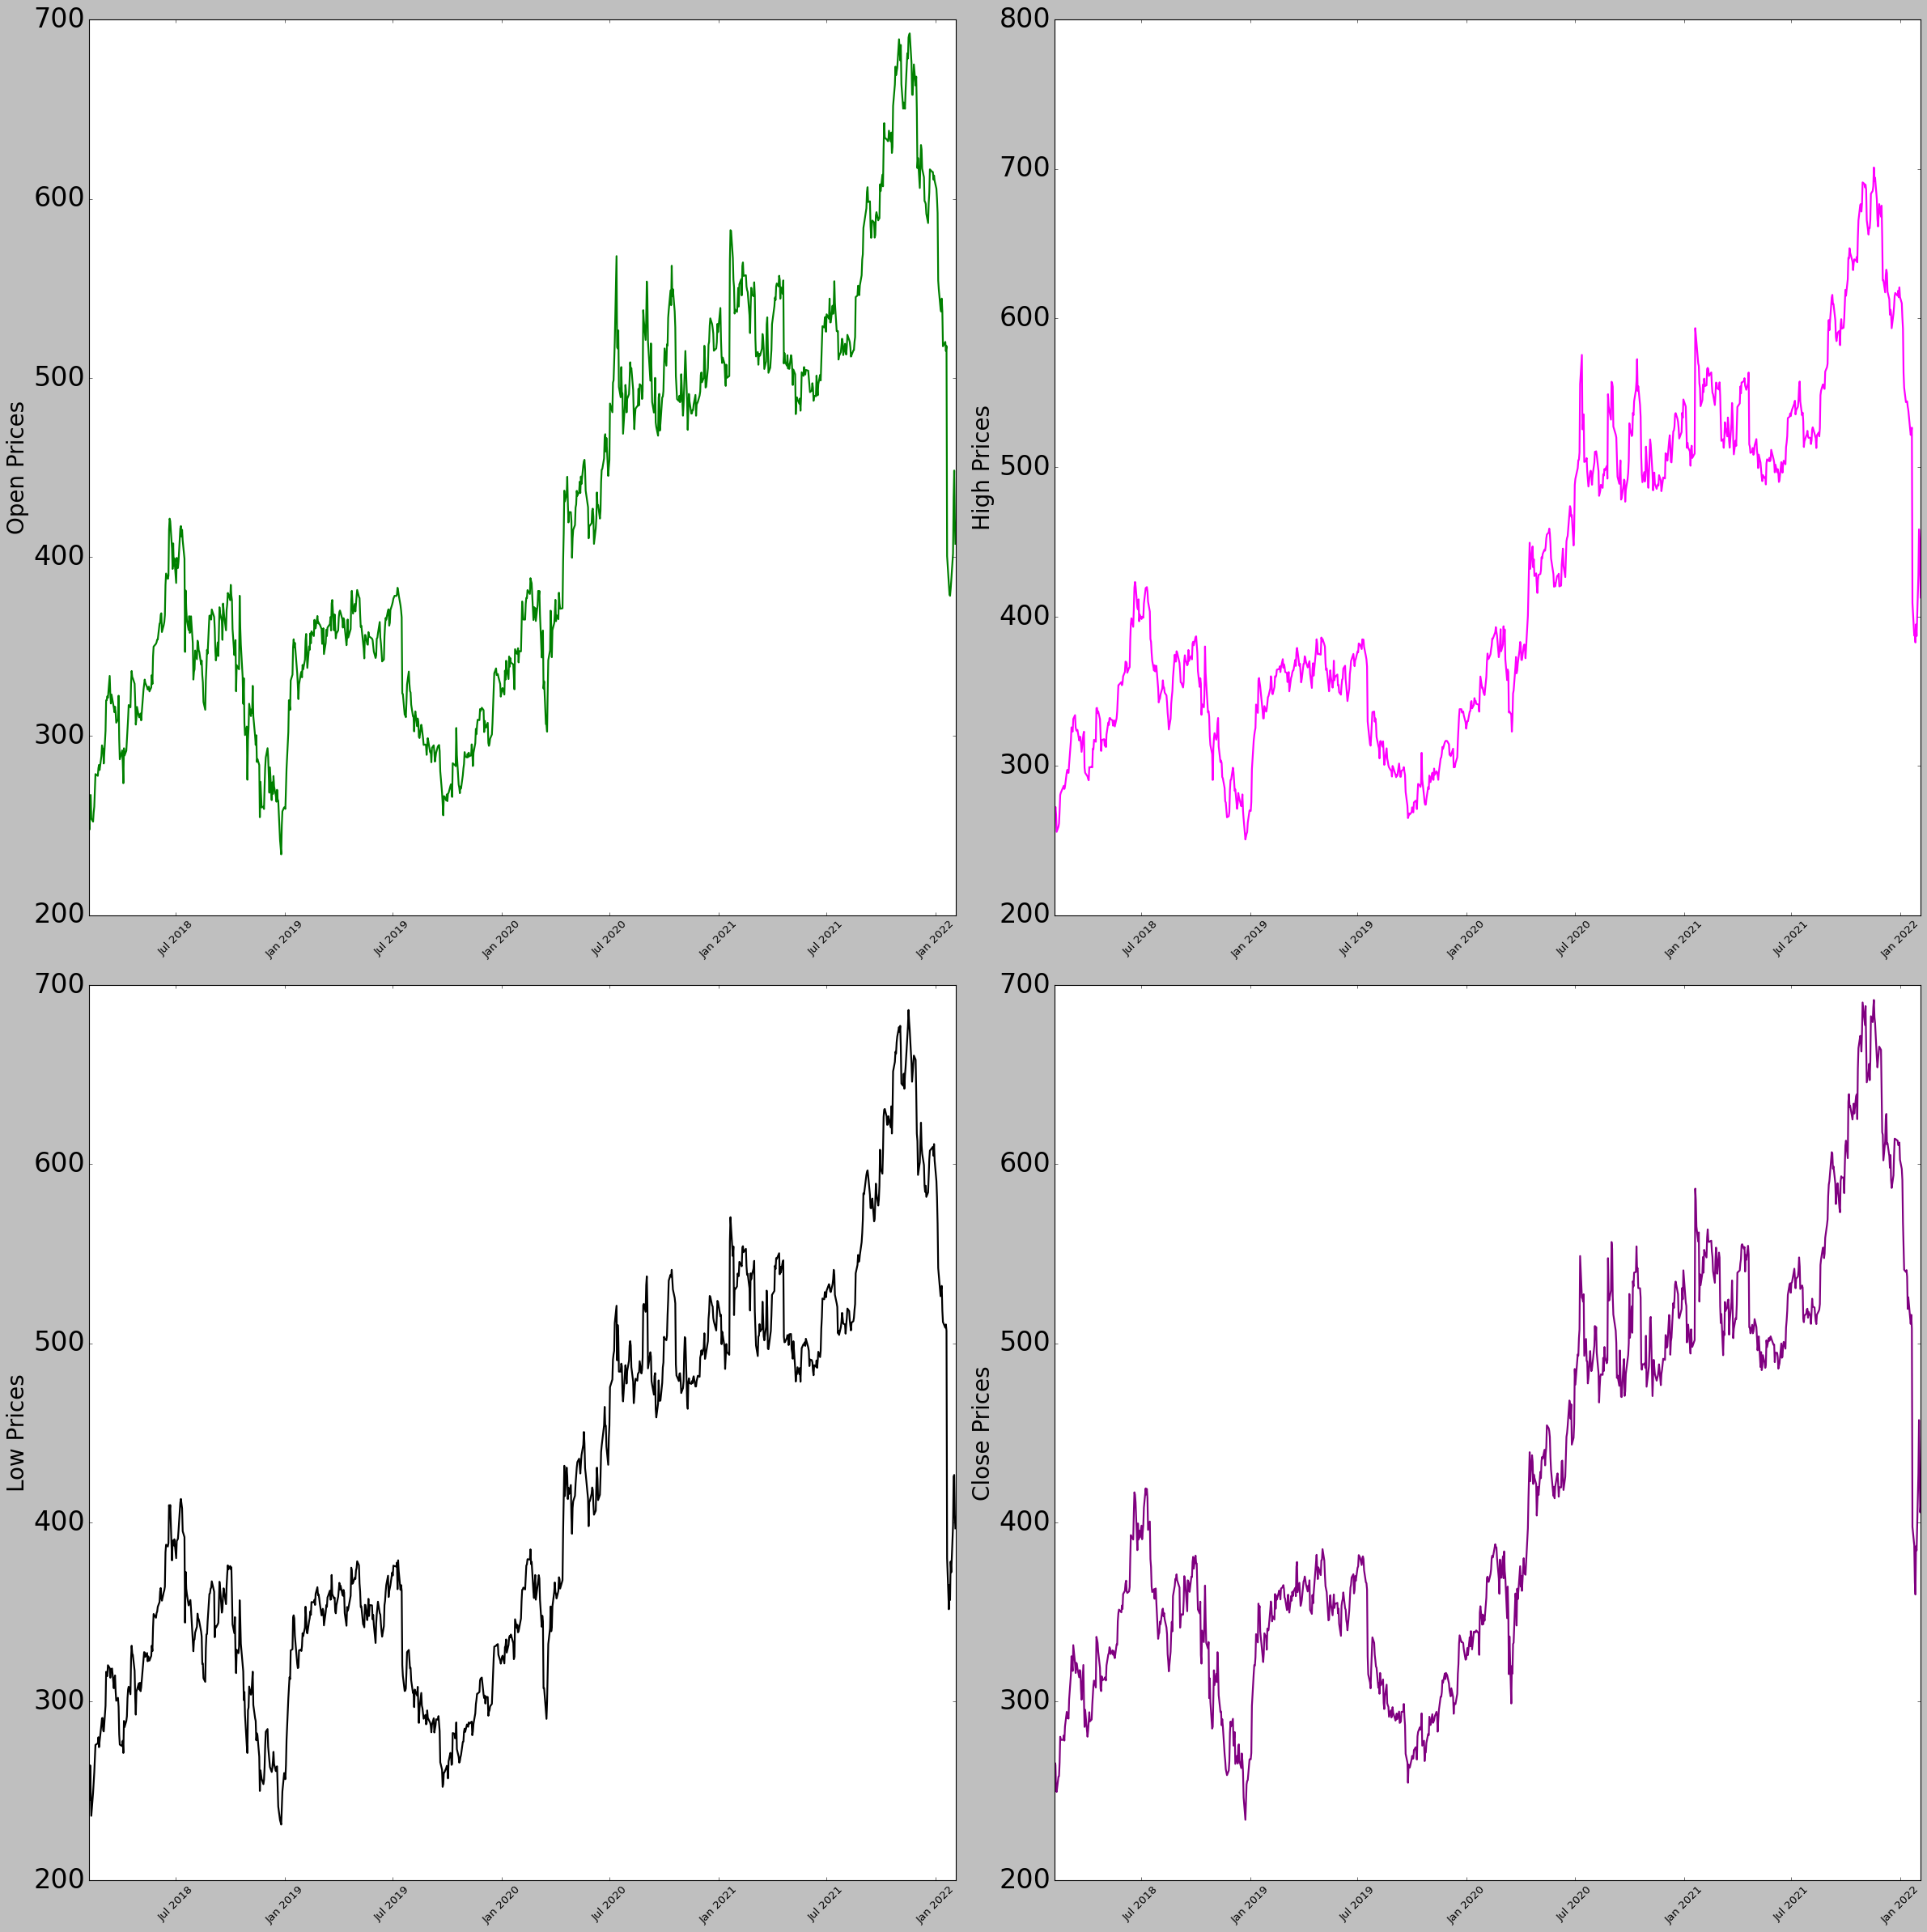

In [144]:
# prices during years
def prices(data = data):
    #subplot settings
    n_rows = 2
    n_cols = 2
    plt.figure(figsize = (30, 30))
    
    # creating list of neccesary features
    features = ['Open', 'High', 'Low', 'Close']
    
    colors = ['', 'green', 'magenta', 'black', 'purple']
    
    for i, feature in enumerate(features, start = 1):
        plt.subplot(n_rows, n_cols, i)
        sns.lineplot(data = data, x = 'Date', y = feature, lw = 2, color = colors[i])
        plt.xticks(rotation = 45);
        plt.ylabel(f'{feature} Prices', fontsize = 25);
        plt.xlabel('')
        plt.yticks(fontsize = 30)

    plt.tight_layout()
    plt.show();
    
prices()

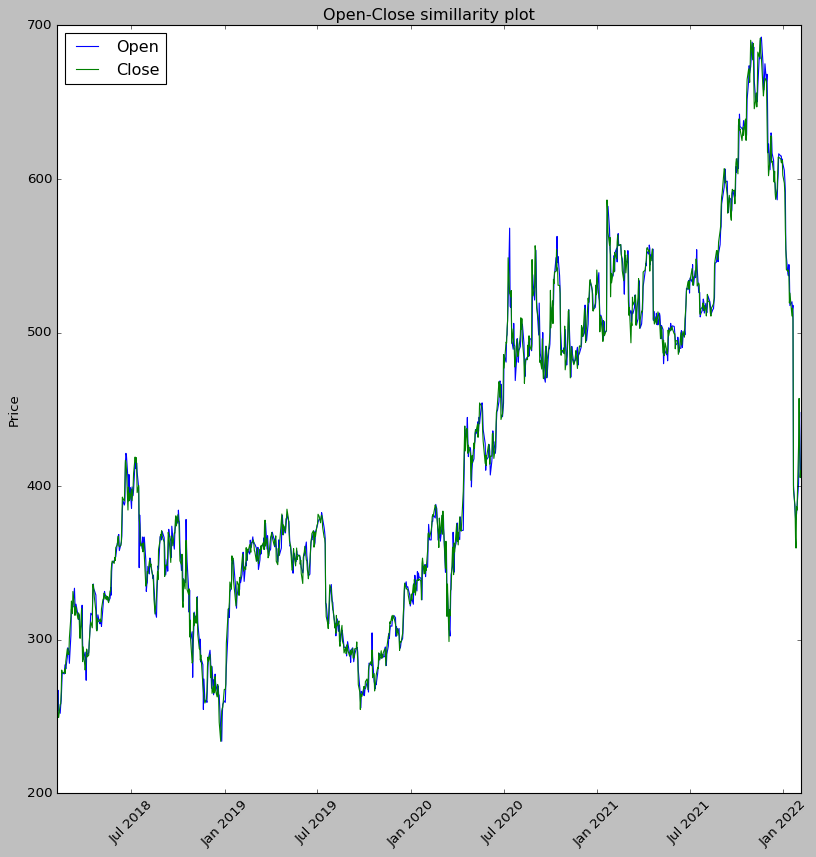

In [173]:
# checing simillarity of open and close plots

plt.figure(figsize = (12,12));
plt.plot(data.Date, data[['Open', 'Close']], label = ['Open', 'Close']);
plt.xticks(rotation = 45);
plt.title('Open-Close simillarity plot');
plt.ylabel('Price');
plt.legend(loc = 'upper left');

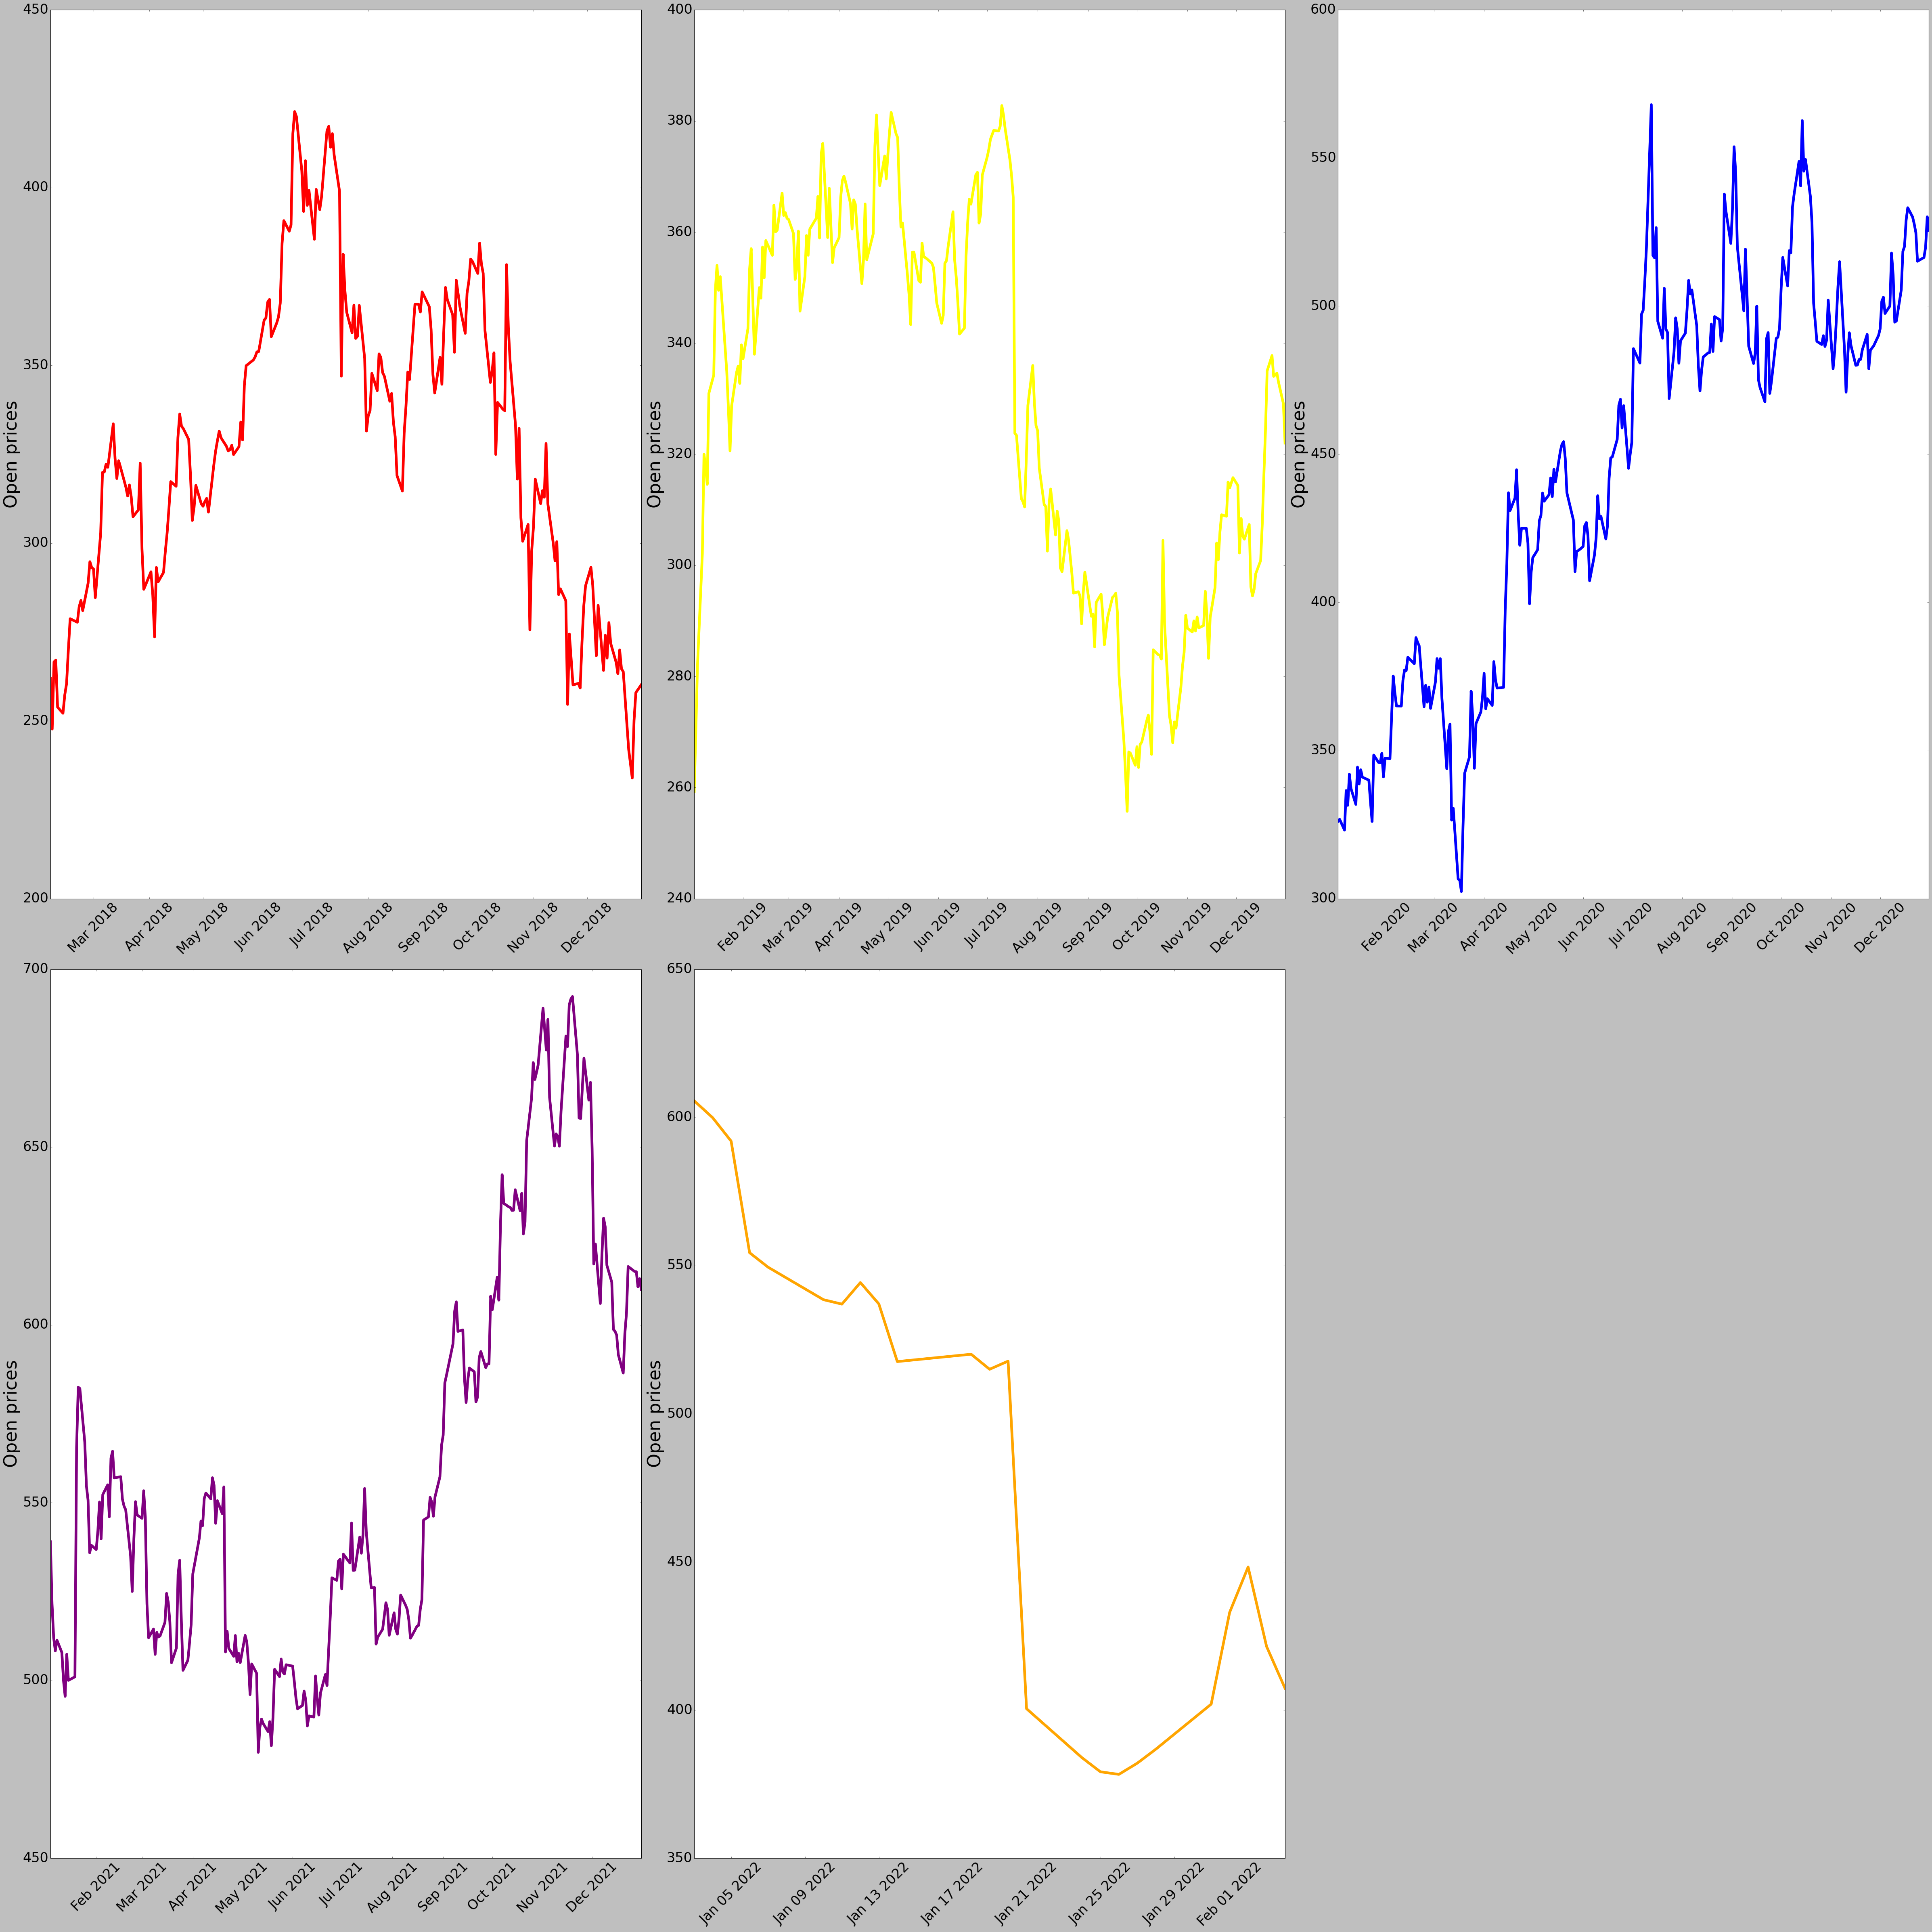

In [158]:
# rising of prices by years

def rising_plots_by_years(feature: str):
    #subplot settings
    n_rows = 2
    n_cols = 3
    plt.figure(figsize = (60, 60))
    
    colors = ['', 'red', 'yellow', 'blue', 'purple', 'orange']
    
    for i, year in enumerate(sorted(data.Date.dt.year.value_counts().keys()), start = 1):
        filtered = data.loc[data.Date.dt.year == year]
        plt.subplot(n_rows, n_cols, i)
        sns.lineplot(data = filtered, x = 'Date', y = feature, palette = 'Accent', lw = 6, color = colors[i])
        plt.xticks(rotation = 45, fontsize = 30)
        plt.yticks(fontsize = 30)
        plt.xlabel('')
        plt.ylabel(f'{feature} prices', fontsize = 40)
    
    plt.tight_layout()
    plt.show();

# changing of open prices
rising_plots_by_years(feature = 'Open')

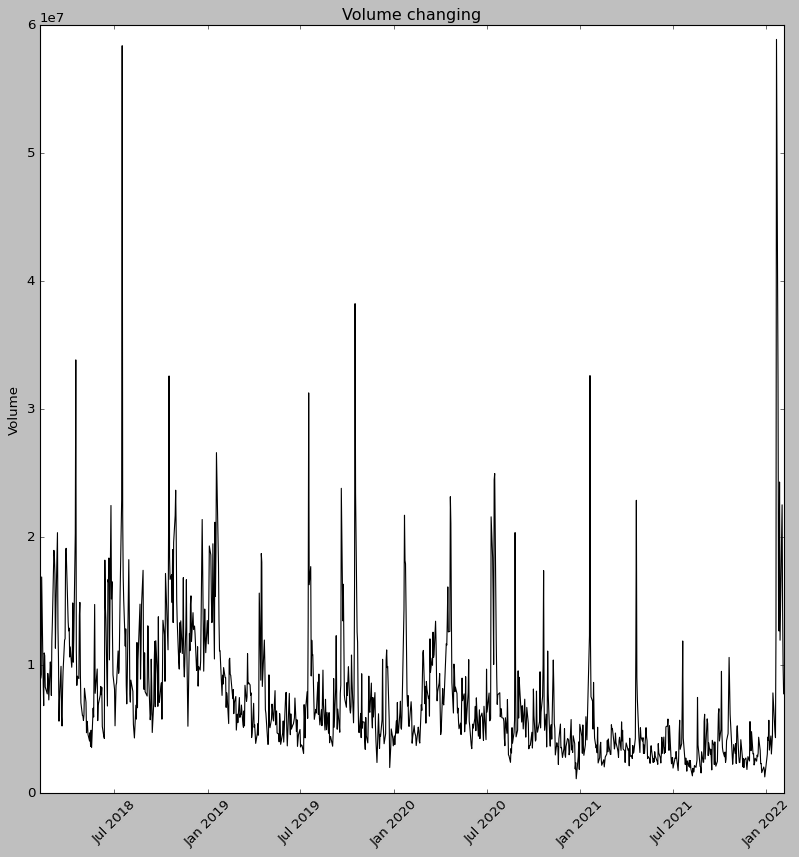

In [214]:
# volume changing
plt.figure(figsize = (12,12))
sns.lineplot(data = data, x = 'Date', y = 'Volume', color = 'black');
plt.xticks(rotation = 45);
plt.xlabel('')
plt.title('Volume changing');

Lets groupby to by months to look better at volume changing by years and months

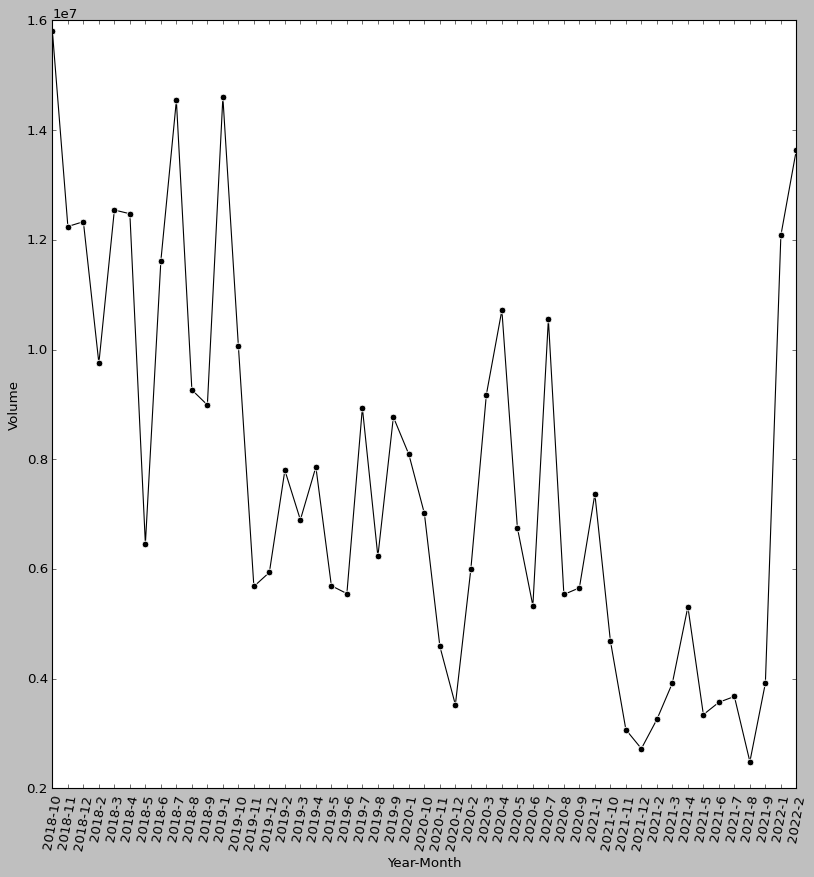

In [303]:
data['Year-Month'] = (data.Date.dt.year.astype(str)) + '-' + (data.Date.dt.month.astype(str))
volume_by_month = pd.DataFrame(data.Volume.groupby(by = data['Year-Month']).aggregate(np.mean))

plt.figure(figsize = (12,12))
sns.lineplot(data = volume_by_month.Volume, marker = 'o', color = 'black');
plt.xticks(rotation = 80);

Lets look at the Change over months.

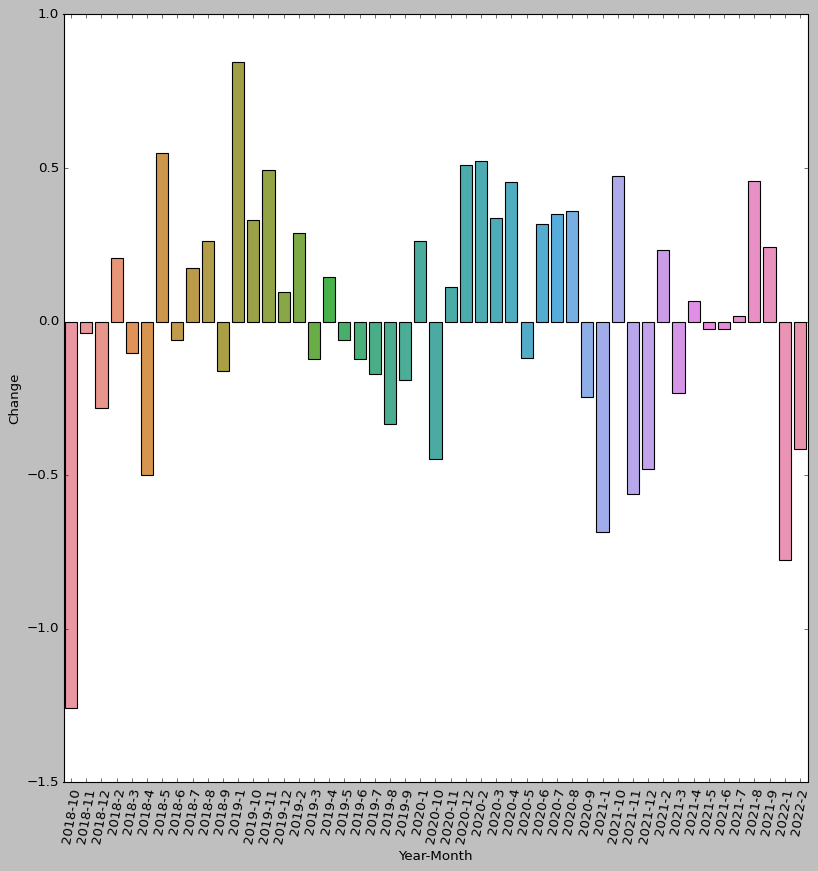

In [304]:
change_by_month = pd.DataFrame(data.Change.groupby(by = data['Year-Month']).aggregate(np.mean))
plt.figure(figsize = (12,12));

sns.barplot(data = change_by_month, x = change_by_month.index, y = change_by_month['Change']);
plt.xticks(rotation = 80);

Outlier detection.

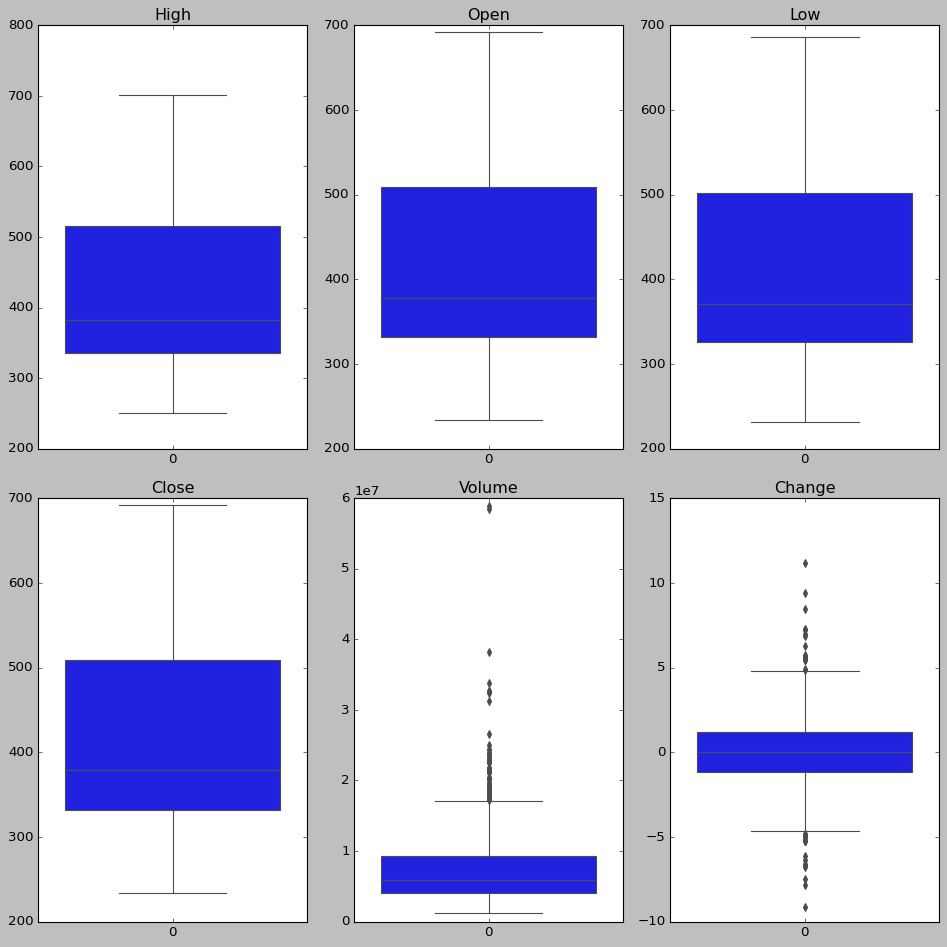

In [301]:
def outlier_plot():
    n_rows = 2
    n_cols = 3
    plt.figure(figsize = (12,12))
    
    features = ['High', 'Open', 'Low', 'Close', 'Volume', 'Change']
    for i, feature in enumerate(features, start = 1):
        plt.subplot(n_rows, n_cols, i);
        sns.boxplot(data[feature]);
        plt.title(f'{feature}')
    
    plt.tight_layout()
    plt.show();

outlier_plot()
    

Data Preparation.

In [311]:
X = data.drop(['Date', 'Year-Month', 'Close'], axis = 1)
y = data.Close

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 42)
print(f'X train shape:{X_train.shape}')
print(f'X test shape:{X_test.shape}')
print(f'y train shape:{y_train.shape}')
print(f'y test shape:{y_test.shape}')

# scale data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = ['High', 'Open', 'Low', 'Volume', 'Change'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = ['High', 'Open', 'Low', 'Volume', 'Change'])

print(f'Train: {np.std(X_train_scaled.values, axis = 0)}')
print(f'Test: {np.std(X_test_scaled.values, axis = 0)}')

X train shape:(706, 5)
X test shape:(303, 5)
y train shape:(706,)
y test shape:(303,)
Train: [1. 1. 1. 1. 1.]
Test: [0.97466397 0.97526347 0.97733777 0.87636459 0.97447007]


First model - Linear Regression


In [312]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

Linear Regression Evaluation Metrics: 
R2 Score: 0.999710008816489
MAE: 1.2857202262804264
MSE Score: 3.3001913267788106


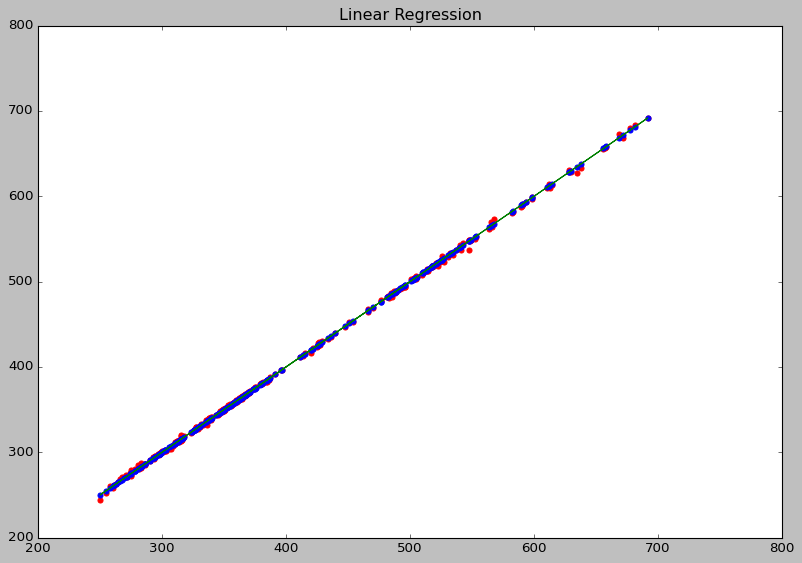

In [347]:
lm_pred = lm.predict(X_test_scaled)

print('Linear Regression Evaluation Metrics: ')
print(f'R2 Score: {r2_score(y_test, lm_pred)}')
print(f'MAE: {mean_absolute_error(y_test, lm_pred)}')
print(f'MSE Score: {mean_squared_error(y_test, lm_pred)}')

def plot_linear():
    plt.figure(figsize = (12, 8))
    
    plt.scatter(y_test, lm_pred, color = 'red', marker = 'o');
    plt.scatter(y_test, y_test, color = 'blue', marker = 'o');
    plt.plot(y_test, y_test, color = 'green');
    plt.title('Linear Regression')

plot_linear()

Second Model - KNeighbors Regressor

In [321]:
# hyperparameter tuning for KNN

param_knn = {
    'n_neighbors':[3,5,7,9,11,13,15,17],
    'weights':['uniform', 'distance'],
    'metric':['minkowski', 'manhattan', 'euclidean']
}

knn_grid = GridSearchCV(KNeighborsRegressor(), param_knn, cv = 5, verbose = 1)
knn_grid.fit(X_train_scaled, y_train)
print(knn_grid.best_score_, knn_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.9963462097700143 {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [325]:
knn = KNeighborsRegressor(**knn_grid.best_params_)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=7, weights='distance')

In [327]:
knn_pred = knn.predict(X_test_scaled)

print('KNN Regressor Evaluation Metrics: ')
print(f'R2 Score: {r2_score(y_test, knn_pred)}')
print(f'MAE: {mean_absolute_error(y_test, knn_pred)}')
print(f'MSE Score: {mean_squared_error(y_test, knn_pred)}')

KNN Regressor Evaluation Metrics: 
R2 Score: 0.9972961713138264
MAE: 3.8035671088599923
MSE Score: 30.77042505626657


Forth Model - Decision Tree Regressor

In [328]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

Decision Tree Regressor Evaluation Metrics: 
R2 Score: 0.9977967930002042
MAE: 3.558746759075906
MSE Score: 25.073192032221677


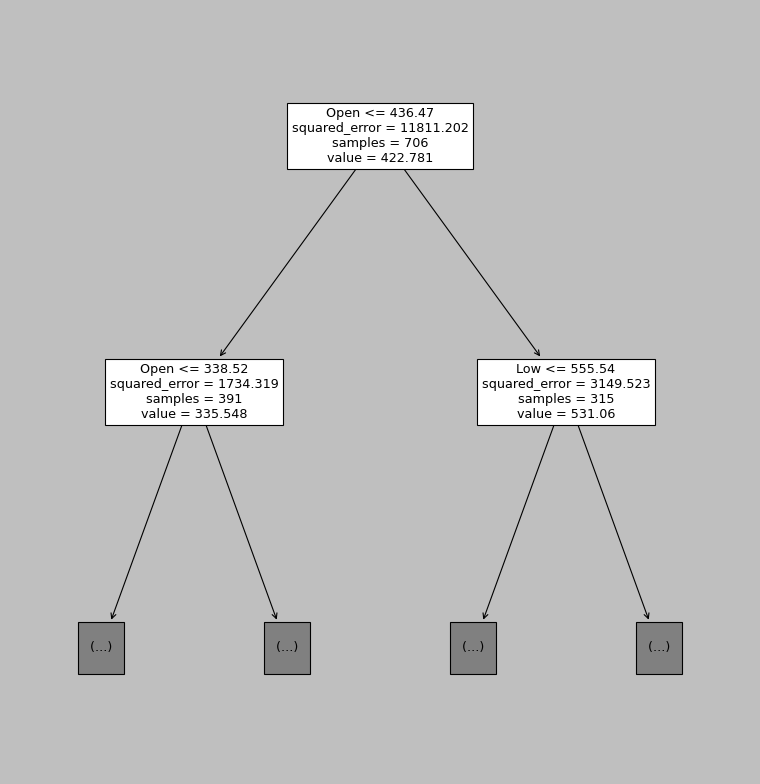

In [416]:
pred_dtree = dtree.predict(X_test)

print('Decision Tree Regressor Evaluation Metrics: ')
print(f'R2 Score: {r2_score(y_test, pred_dtree)}')
print(f'MAE: {mean_absolute_error(y_test, pred_dtree)}')
print(f'MSE Score: {mean_squared_error(y_test, pred_dtree)}')

def tree_vis():
    plt.figure(figsize = (12,12))
    tplot = plot_tree(decision_tree = dtree, feature_names = ['High', 'Open', 'Low', 'Volume', 'Change'], max_depth = 1)
    plt.show();

# show the first node of decision tree
tree_vis()


Fourth Model - Support Vector Regressor

In [331]:
# hyperparameter tuning

param_svr = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':np.linspace(0.001, 1, 10),
    'C':np.linspace(0.001, 1, 10)
}

grid_svr = GridSearchCV(SVR(), param_svr, cv = 5, verbose = 1)
grid_svr.fit(X_train_scaled, y_train)
print(grid_svr.best_score_, grid_svr.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
0.9996013113472181 {'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}


In [332]:
svr = grid_svr.best_estimator_
svr.fit(X_train_scaled, y_train)

SVR(gamma=0.001, kernel='linear')

In [339]:
pred_svr = svr.predict(X_test_scaled)

print('Support Vector Regressor Evaluation Metrics: ')
print(f'R2 Score: {r2_score(y_test, pred_svr)}')
print(f'MAE: {mean_absolute_error(y_test, pred_svr)}')
print(f'MSE Score: {mean_squared_error(y_test, pred_svr)}')

Support Vector Regressor Evaluation Metrics: 
R2 Score: 0.9996916298847307
MAE: 1.3524885956907826
MSE Score: 3.5093493792744224


Fifth Model - Random Forest Regressor

In [335]:
# hyperparameter tuning

param_rfor = {
    'n_estimators':[30,40,50,60,70,80,90,100]
}

grid_rfr = GridSearchCV(RandomForestRegressor(), param_rfor, cv = 5, verbose = 1)
grid_rfr.fit(X_train, y_train)
print(grid_rfr.best_score_, grid_rfr.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.9983770697122523 {'n_estimators': 50}


In [336]:
rfor = grid_rfr.best_estimator_
rfor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [340]:
pred_rfor = rfor.predict(X_test)

print('Random Forest Regressor Evaluation Metrics: ')
print(f'R2 Score: {r2_score(y_test, pred_rfor)}')
print(f'MAE: {mean_absolute_error(y_test, pred_rfor)}')
print(f'MSE Score: {mean_squared_error(y_test, pred_rfor)}')

Random Forest Regressor Evaluation Metrics: 
R2 Score: 0.9986293203295216
MAE: 2.6524819481188353
MSE Score: 15.598767885065845


Sixth Model - AdaBoost Regressor

In [341]:
# hyperparameter tuning

param_ada = {
    'n_estimators':[30,40,50,60,70,80,90],
    'learning_rate':np.linspace(0.001, 1, 10)
}

grid_ada = GridSearchCV(AdaBoostRegressor(), param_ada, cv = 5, verbose = 1)
grid_ada.fit(X_train_scaled, y_train)
print(grid_ada.best_score_, grid_ada.best_params_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
0.996063205950389 {'learning_rate': 1.0, 'n_estimators': 90}


In [343]:
ada = AdaBoostRegressor(learning_rate = 0.1, n_estimators = 90)
ada.fit(X_train_scaled, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=90)

In [344]:
pred_ada = ada.predict(X_test_scaled)

print('AdaBoost Regressor Evaluation Metrics: ')
print(f'R2 Score: {r2_score(y_test, pred_ada)}')
print(f'MAE: {mean_absolute_error(y_test, pred_ada)}')
print(f'MSE Score: {mean_squared_error(y_test, pred_ada)}')

AdaBoost Regressor Evaluation Metrics: 
R2 Score: 0.9920679531829013
MAE: 7.391461817450168
MSE Score: 90.26919988549278


Final Model - Gradient Boost Regressor

In [346]:
param_grad = {
    'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate':np.linspace(0.001, 1, 10),
    'n_estimators':[30,40,50,60,70,80,90,100],
    'max_depth':[2,3,4,5,6,7,8,9]
}

grid_grad = GridSearchCV(GradientBoostingRegressor(), param_grad, cv = 5, verbose = 1)
grid_grad.fit(X_train_scaled, y_train)
print(grid_grad.best_score_, grid_grad.best_params_)

Fitting 5 folds for each of 2560 candidates, totalling 12800 fits
0.9989564895130739 {'learning_rate': 0.112, 'loss': 'huber', 'max_depth': 5, 'n_estimators': 100}


In [350]:
grad = GradientBoostingRegressor(**grid_grad.best_params_)
grad.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.112, loss='huber', max_depth=5)

In [352]:
pred_grad = grad.predict(X_test_scaled)

print('Gradient Boosting Regressor Evaluation Metrics: ')
print(f'R2 Score: {r2_score(y_test, pred_grad)}')
print(f'MAE: {mean_absolute_error(y_test, pred_grad)}')
print(f'MSE Score: {mean_squared_error(y_test, pred_grad)}')

Gradient Boosting Regressor Evaluation Metrics: 
R2 Score: 0.9989550441039846
MAE: 2.3591089818308513
MSE Score: 11.89192837914227


Let's make plot to see errors and make final evaluation which model have least error.

In [397]:
mse_list = []
mae_list = []
predictions = {'Linear Regression':lm_pred, 
               'KNN Regressor':knn_pred, 
               'Decision Tree Regressor':pred_dtree, 
               'Support Vector Regressor':pred_svr, 
               'Random Forest Regressor':pred_rfor, 
               'AdaBoost Regressor':pred_ada, 
               'Gradient Boosting Regressor':pred_grad}

for name, value in predictions.items():
    mse = mean_squared_error(y_test, value)
    mae = mean_absolute_error(y_test, value)
    mse_list.append(mse)
    mae_list.append(mae)

models = predictions.keys()

errors_df = pd.DataFrame(data)

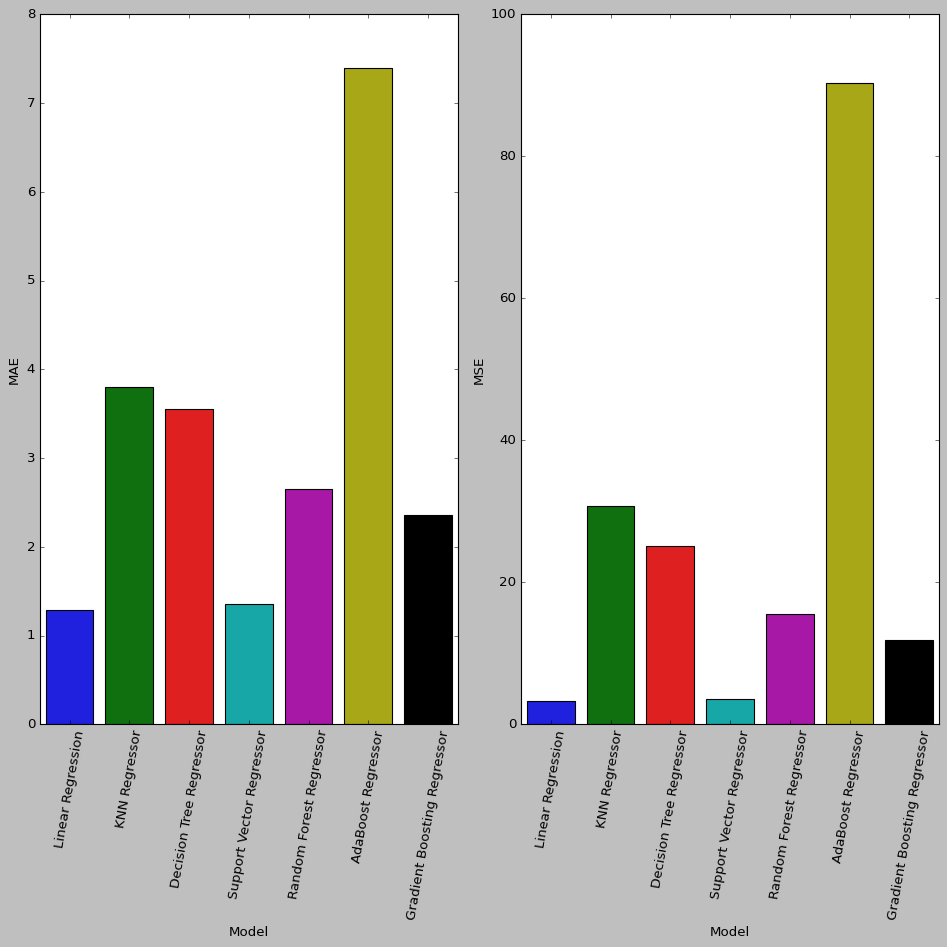

In [408]:
plt.figure(figsize = (12,12))
n_rows = 1
n_cols = 2
plt.subplot(n_rows, n_cols, 1)
sns.barplot(data = errors_df, x = 'Model', y = 'MAE')
plt.xticks(rotation = 80)
plt.subplot(n_rows, n_cols, 2)
sns.barplot(data = errors_df, x = 'Model', y = 'MSE');
plt.xticks(rotation = 80);
plt.tight_layout()


As we can see in the plot, best models for this datasets are Linear Regression and Support Vector Regressor.They have least mean absolute and mean squared errors.